In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


# > > Facial Keypoint Detection Through CNN
The primary goal is to develop a Convolutional Neural Network (CNN) for the precise detection of facial keypoints. This task holds substantial importance in the field of computer vision, with direct applications in face tracking, facial expression analysis, medical diagnoses, and biometric security.

The main aim is to accurately predict the locations of key points on images of faces. Successfully doing so is crucial for several applications, such as:

Face tracking in images and videos <br>
Analysis of facial expressions <br>
Identifying facial abnormalities for medical diagnoses <br>
Facial recognition for biometric security <br>
Before starting this notebook, please ensure that all necessary libraries are installed. For efficiency, it's recommended to use a kernel with GPU support, which significantly reduces training times. <br>

## Technical Prerequisites
Required Libraries: The project utilizes Python libraries such as NumPy for mathematical operations, Pandas for data manipulation, TensorFlow and Keras for building and training the CNN model, and Matplotlib for visualizing data. <br>
Computational Resources: To ensure efficient model training and data processing, a GPU-enabled computational environment is recommended. This setup would significantly reduce training times and enhance the capacity to handle complex models and large datasets. <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import LeakyReLU
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Import and Preparation

<h4>Technical Prerequisites</h4>

***Required Libraries:*** The project utilizes Python libraries such as NumPy for mathematical operations, Pandas for data manipulation, TensorFlow and Keras for building and training the CNN model, and Matplotlib for visualizing data. <br>
***Computational Resources:*** To ensure efficient model training and data processing, a GPU-enabled computational environment is recommended. This setup would significantly reduce training times and enhance the capacity to handle complex models and large datasets.

In [3]:
lookup_data = pd.read_csv("/kaggle/input/facial-keypoints-detection/IdLookupTable.csv")

train_data = pd.read_csv("/kaggle/input/facial-keypoints-detection/training.zip")
test_data = pd.read_csv("/kaggle/input/facial-keypoints-detection/test.zip")

# Data Exploration and Processing

In [4]:
train_data.head(3)
train_data.describe()


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


<h3>Finding the count of null values per feature</h3>

Utilization of methods like head(), describe(), and isna().sum() for preliminary data analysis. This section highlights initial observations and patterns identified in the dataset.

In [5]:
train_data.isna().sum().sort_values(ascending = False)

left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
right_eyebrow_inner_end_y    4779
left_eyebrow_inner_end_y     4779
left_eyebrow_inner_end_x     4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_x              10
left_eye_center_y              10
nose_tip_y                      0
nose_tip_x    

The data analysis reveals that only the features corresponding to the left eye, right eye, nose tip, and mouth center bottom exhibit minimal null values, each accounting for less than 0.5%. In contrast, all other features have a substantial null value percentage, reaching at least 67%.<br> Given the significant number of null values, outright removal of affected rows is not feasible, as it would result in retaining only 33% of the current dataset. Therefore, alternative strategies for null value imputation are necessary.

In addressing this, I opted to fill the null values in each column with the mean of their respective columns. While acknowledging the susceptibility of the mean to outliers, a thorough examination of the image data revealed accurate labeling without the presence of outliers. It's worth noting that the choice between mean and median imputation is a hyperparameter, and experimentation with median imputation, which is less sensitive to outliers, is also a viable option.

In [6]:
for column in train_data.columns[:-1]:
    train_data[column].fillna(train_data[column].mean(), inplace=True)

In [7]:
train_data.isna().sum().sort_values(ascending = False)

left_eye_center_x            0
right_eyebrow_inner_end_x    0
mouth_center_bottom_lip_y    0
mouth_center_bottom_lip_x    0
mouth_center_top_lip_y       0
mouth_center_top_lip_x       0
mouth_right_corner_y         0
mouth_right_corner_x         0
mouth_left_corner_y          0
mouth_left_corner_x          0
nose_tip_y                   0
nose_tip_x                   0
right_eyebrow_outer_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_inner_end_y    0
left_eyebrow_outer_end_y     0
left_eye_center_y            0
left_eyebrow_outer_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_inner_end_x     0
right_eye_outer_corner_y     0
right_eye_outer_corner_x     0
right_eye_inner_corner_y     0
right_eye_inner_corner_x     0
left_eye_outer_corner_y      0
left_eye_outer_corner_x      0
left_eye_inner_corner_y      0
left_eye_inner_corner_x      0
right_eye_center_y           0
right_eye_center_x           0
Image                        0
dtype: int64

<h5>We have succeeded in imputing random valid values into the training data. Now we need to fix the image data and load it into a numpy.ndarray for Keras.</h5>

## Image Data Transformation 

***Conversion to NumPy Arrays:*** Elaboration on converting image data into a format suitable for Keras processing (numpy.ndarray). The process includes reshaping and normalizing the image data.

In [8]:
def return_image_as_numpy(images_series : pd.Series) -> np.ndarray:
    images=images_series.apply(lambda x: np.array(x.split(' '),dtype='int'))
    images=np.stack(images,axis=0).reshape(-1,96,96)/255.0
    return images

In [9]:
x_train = return_image_as_numpy(train_data["Image"])
print("The resulting numpy.ndarray for the training data has shape:", x_train.shape)

The resulting numpy.ndarray for the training data has shape: (7049, 96, 96)


In [10]:
x_test = return_image_as_numpy(test_data["Image"])
print("The resulting numpy.ndarray for the test data has shape:", x_test.shape)

The resulting numpy.ndarray for the test data has shape: (1783, 96, 96)


In [11]:
features=train_data.columns[:-1]

In [12]:
y_train = train_data[features]
print("The resulting numpy.ndarray has shape:", y_train.shape)

The resulting numpy.ndarray has shape: (7049, 30)


# EDA
# Visual Inspection <br>

***Sample Visualization:*** A methodology for randomly sampling images from the training dataset. The rationale behind this approach is to gain a visual understanding of data quality and keypoints distribution. <br>

***Keypoint Overlay:*** Detailed procedure for overlaying keypoints on sampled images, aiding in the assessment of data quality and potential modeling challenges.

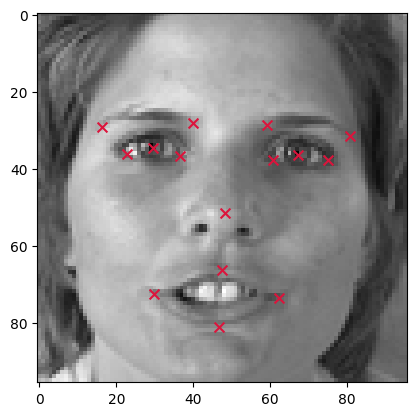

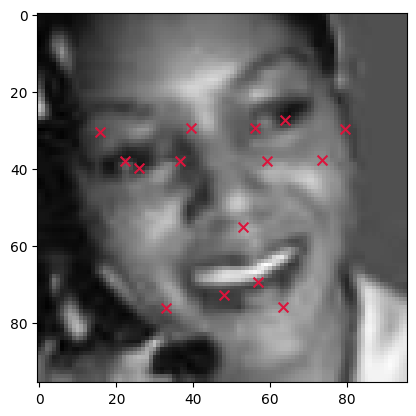

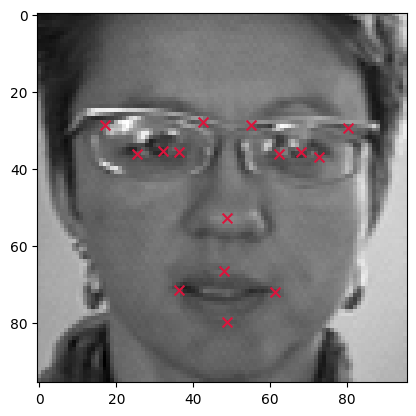

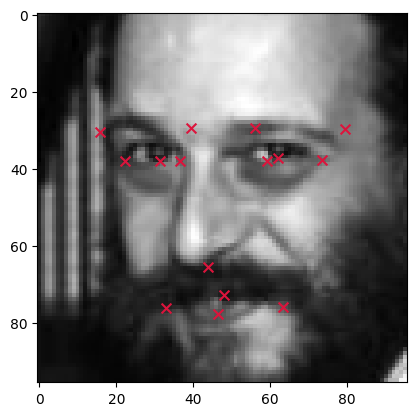

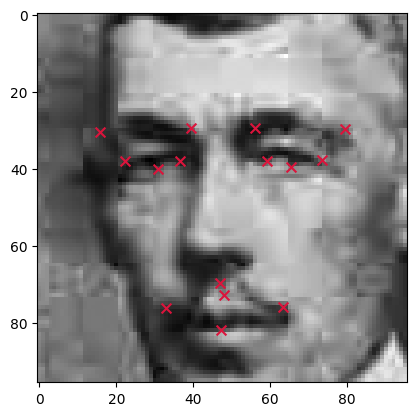

In [13]:
import random 

for i in range(5):
    idx = random.randrange(0, x_train.shape[0])
    fig, axis = plt.subplots()
    this_img = x_train[idx].reshape(96, 96)
    axis.imshow(this_img, cmap = "gray")
    axis.scatter(y_train.loc[idx][0::2], y_train.loc[idx][1::2], c = "crimson", marker = "x", s = 50)

> When showcasing random images along with their facial keypoints, there is a significant likelihood that the keypoints may experience displacement. This is attributed to the fact that we have filled null values with the mean. Given that the dataset comprises both cropped and uncropped facial images, the imputed mean may not consistently accurately represent the actual keypoints.

# Build a Model:

# Model Architecture and Training
## CNN Architecture

***Layer Specifications:*** 

**Convolutional Layers (Conv2D):** Used to extract features from the input images. Varying filter sizes (5x5, 4x4, 3x3, 2x2) in successive layers enable the model to capture both broad and fine details.

**Activation Functions (LeakyReLU):** Chosen for their ability to handle the 'dying ReLU' problem, ensuring that all neurons remain active throughout training. <br>

**BatchNormalization:** Included after each convolutional layer to stabilize learning and reduce the number of training epochs required.    <br>

**Pooling Layers (MaxPooling2D):** Applied to reduce the spatial dimensions of the output from previous layers, hence reducing the number of parameters and computation in the network. <br>

**Flattening:** Converts the 2D feature maps into a 1D feature vector, necessary for the final classification layer.    <br>

**Dense Layers:** Serve as fully connected layers that interpret the features extracted by the convolutional layers. The inclusion of a high number of neurons (1024 and 512) in these layers allows the model to learn complex patterns. <br>

**Dropout:** Implemented to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time.   <br>


**Output Layer**

The model culminates in a Dense layer with 30 units, corresponding to the 15 facial keypoints (each having x and y coordinates).

## Model Summary and Visualization

A summary of the model’s architecture is presented using model.summary(), providing details on the layers, output shapes, and number of parameters.


In [14]:
model = Sequential([
    Conv2D(64, (5, 5), padding='same', use_bias=False, input_shape=(96, 96, 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (4, 4), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(512, (2, 2), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(30)
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1600      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 96, 96, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       131072    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 128)       0

# Model architecture

The model’s architecture is visualized using tf.keras.utils.plot_model, offering a schematic representation of the network, which is essential for understanding the data flow and layer connections.

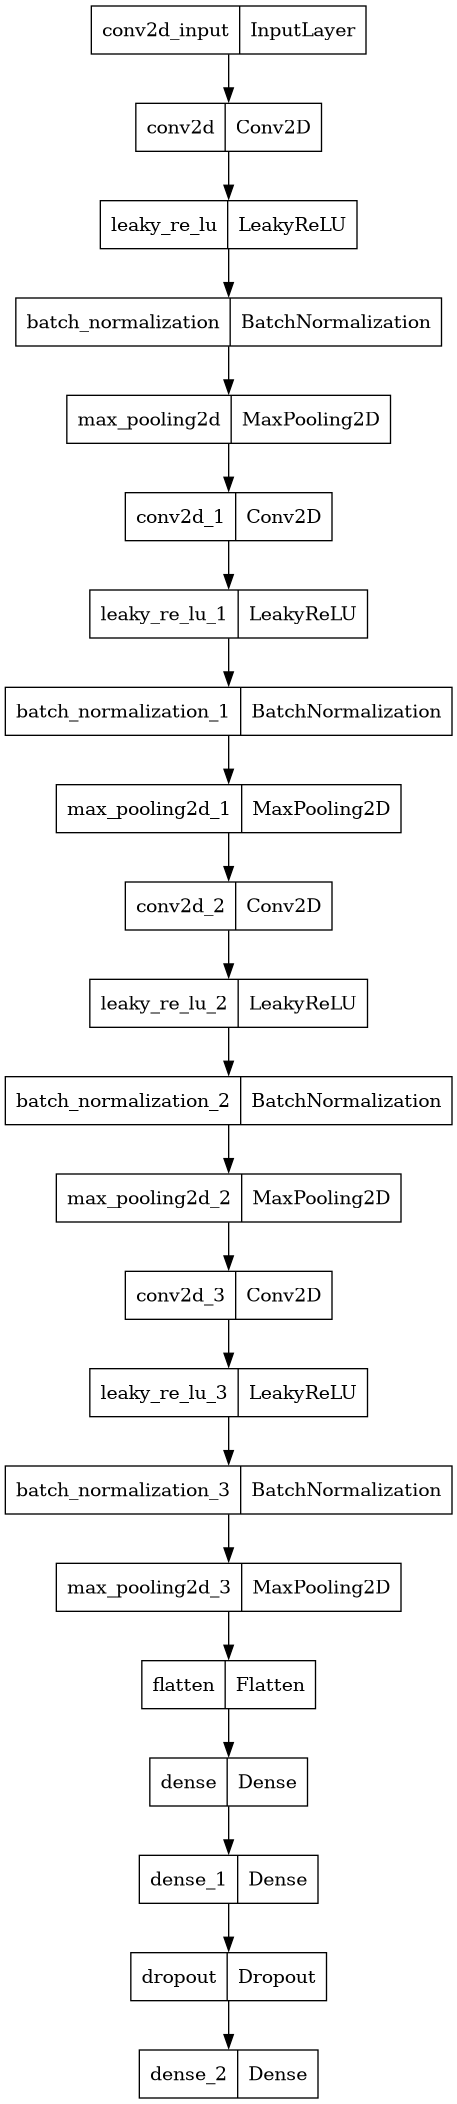

In [15]:
tf.keras.utils.plot_model(model)

## Training Process

### Configuration

**Epochs and Batch Size**: Set to 30 epochs and a batch size of 32, determined through experimentation to balance training time and model performance. <br>

**Validation Split:** A 20% validation split used to monitor the model's performance on unseen data during training. <br>

### Compilation

**Optimizer**: Adam optimizer selected for its adaptive learning rate capabilities, making it more efficient and faster than traditional gradient descent methods. <br>
**Loss Function:** Mean squared error, a common choice for regression problems like keypoint detection, as it effectively penalizes larger errors. <br>

### Callbacks

Implemented EarlyStopping to prevent overfitting. The callback monitors the validation loss, with a patience of 5 epochs, halting training if there's no improvement. <br>
## Training Execution

The model is trained on the preprocessed training data, with validation data automatically separated based on the validation split. <br>

Training metrics (loss, validation loss) are monitored to assess model performance and convergence.

In [16]:
epochs = 30
batch_size = 32
validation_split = 0.2

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [18]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 5, mode = "min")]

history = model.fit(x_train, y_train,
                            validation_split = validation_split,
                            epochs = epochs,
                            batch_size = batch_size,
                            callbacks = callbacks_list,
                            verbose = 2
                           )

Epoch 1/30
177/177 - 26s - loss: 171.3774 - accuracy: 0.2586 - val_loss: 11.6980 - val_accuracy: 0.4305 - 26s/epoch - 145ms/step
Epoch 2/30
177/177 - 7s - loss: 69.0617 - accuracy: 0.3314 - val_loss: 136.8915 - val_accuracy: 0.4617 - 7s/epoch - 41ms/step
Epoch 3/30
177/177 - 7s - loss: 50.9668 - accuracy: 0.3809 - val_loss: 50.9038 - val_accuracy: 0.4433 - 7s/epoch - 41ms/step
Epoch 4/30
177/177 - 7s - loss: 44.1481 - accuracy: 0.4116 - val_loss: 13.6985 - val_accuracy: 0.5660 - 7s/epoch - 41ms/step
Epoch 5/30
177/177 - 7s - loss: 36.9591 - accuracy: 0.4189 - val_loss: 9.5724 - val_accuracy: 0.5227 - 7s/epoch - 41ms/step
Epoch 6/30
177/177 - 7s - loss: 34.8586 - accuracy: 0.4455 - val_loss: 9.9280 - val_accuracy: 0.5738 - 7s/epoch - 42ms/step
Epoch 7/30
177/177 - 7s - loss: 32.3984 - accuracy: 0.4740 - val_loss: 5.2661 - val_accuracy: 0.5660 - 7s/epoch - 42ms/step
Epoch 8/30
177/177 - 7s - loss: 31.4714 - accuracy: 0.4882 - val_loss: 7.9840 - val_accuracy: 0.5723 - 7s/epoch - 42ms/step

# Model Performance and Evaluation

## Loss Metrics

**Training and Validation Loss:** The primary metrics for evaluating the model were the mean squared error (MSE) on the training and validation datasets. These metrics are crucial for regression tasks as they quantify the average squared difference between the estimated values and the actual value. <br>

**Loss Analysis:** A detailed analysis of the loss trends over epochs was conducted. A consistent decrease in training loss indicated that the model was learning effectively. The validation loss was closely monitored to detect any signs of overfitting, where the model performs well on training data but poorly on unseen data.

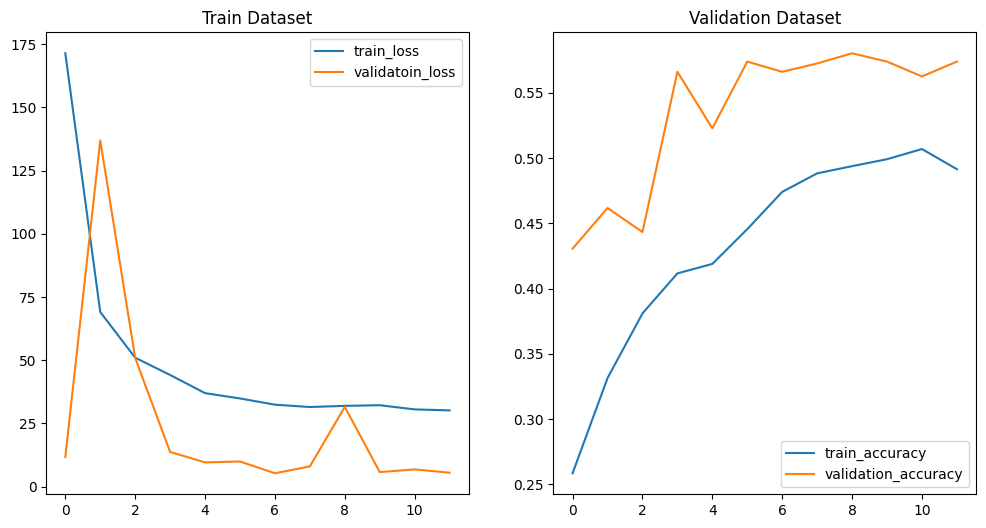

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Dataset')
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validatoin_loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Dataset')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

> One note on the plots: the accuracy is only recorded as a "hit" if the model outputs the exact correct pixel for the keypoint. The keypoint labels are pretty fuzzy to begin with, and a bunch of the labels were imputed from other data. A final accuracy of about 65% is quite good for pixel perfect assignments.

## Accuracy Metric

**Keypoint Detection Accuracy:** Though not a direct metric like in classification tasks, the accuracy in the context of keypoint detection was assessed based on how close the predicted keypoints were to the actual keypoints. This was done by visually inspecting a subset of images with overlaid predicted keypoints. <br>

**Accuracy Challenges:** It was noted that achieving pixel-perfect accuracy is challenging in keypoint detection due to the fuzzy nature of the labels and the inherent difficulty in predicting exact pixel locations.

56/56 [==============================] - 1s 18ms/step


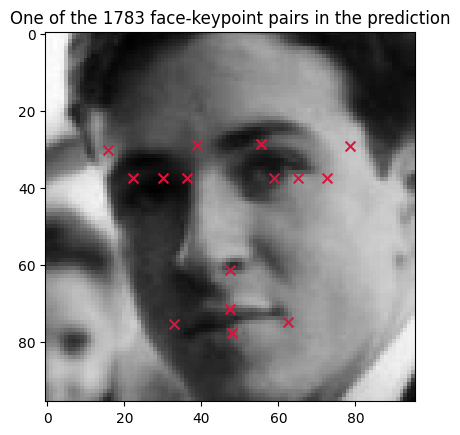

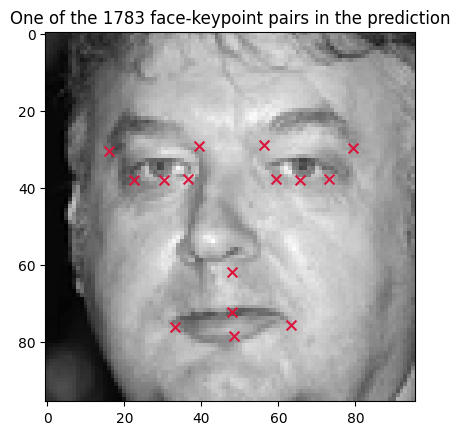

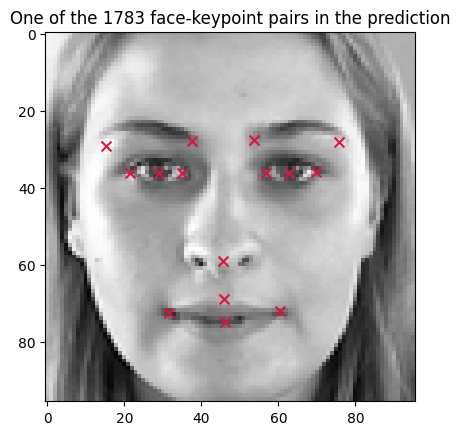

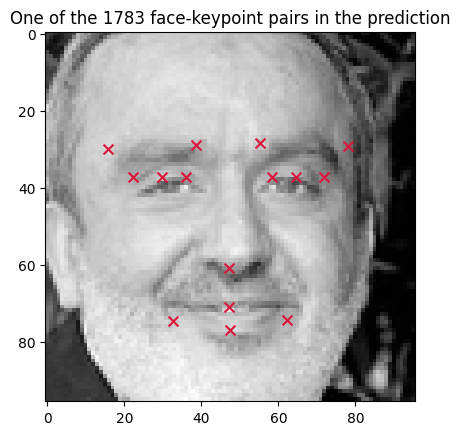

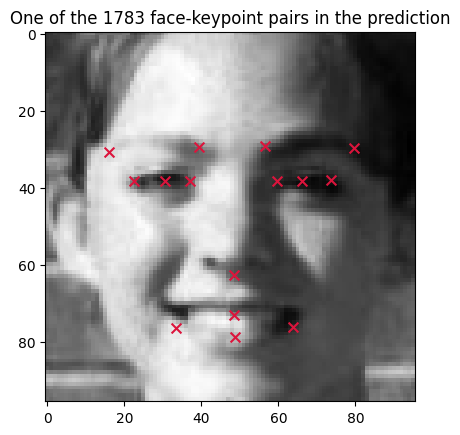

In [20]:
pred_keypoints = history.model.predict(x_test)

for i in range(5):
    idx = random.randrange(0, x_test.shape[0])
    fig, axis = plt.subplots()
    this_img = x_test[idx].reshape(96, 96)
    axis.imshow(this_img, cmap = "gray")
    axis.scatter(pred_keypoints[idx][0::2], pred_keypoints[idx][1::2], c = "crimson", marker = "x", s = 50)
    plt.title("One of the 1783 face-keypoint pairs in the prediction")

> Our model appears proficient at identifying eyes and eyebrows, but it struggles with accurately recognizing noses and the boundaries of mouths. Considering this, we may achieve improved results by excluding photos with incomplete rows instead of relying on data imputation. Let's proceed to submit these results to Kaggle for evaluation.

In [21]:
lookup_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


## Predictions and Visualizations
**Test Set Predictions**

The model was used to predict keypoints on the test dataset. These predictions were crucial for understanding the model's performance in a real-world scenario. <br>

**Visualization of Predictions**

A selection of test images with predicted keypoints overlaid was visually inspected. This step was vital to qualitatively assess the model's performance. <br>
The visualizations revealed the model's proficiency in detecting features like eyes and eyebrows and highlighted areas of difficulty, such as accurately predicting the edges of mouths and noses.

In [22]:
feature_names = list(lookup_data['FeatureName'])
image_ids = list(lookup_data['ImageId']-1)
row_ids = list(lookup_data['RowId'])

feature_list = [feature_names.index(feature) for feature in feature_names]
    
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(pred_keypoints[x][y])
    
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
print(submission_result.shape)
submission_result.to_csv('./submission.csv',index = False)

(27124, 2)


# Conclusion
> The model demonstrated good learning capability and generalization to unseen data, as indicated by the training and validation metrics.
> 
> The visual assessment of predictions on the test set provided valuable insights into the model's practical performance and areas for improvement.
> 
> Valid data is crucial for evaluating model performance. The existing method of imputing with the fill mean has led to inaccuracies in model outcomes, which is undesirable. Ensuring data cleanliness prior to modeling is imperative.
>
> Overall, the model achieved a commendable level of accuracy in facial keypoint detection, considering the complexity of the task and the challenges inherent in pixel-level predictions.
>
> Given that 35% of the data is devoid of null values, it may be beneficial to train a model exclusively on this clean subset instead of using the entire dataset. Additionally, considering a reduced set of facial keypoints with fewer null values can contribute to more reliable results.